In [1]:
import os
import tarfile
import urllib.request

# Створення директорії для збереження даних
cifar10_dir = 'cifar-10-batches-py'
if not os.path.exists(cifar10_dir):
    os.makedirs(cifar10_dir)

# Завантаження CIFAR-10 з офіційного сайту
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
filename = 'cifar-10-python.tar.gz'
filepath = os.path.join(cifar10_dir, filename)

if not os.path.exists(filepath):
    print("Завантаження CIFAR-10...")
    urllib.request.urlretrieve(url, filepath)

# Розпаковка архіву
with tarfile.open(filepath, 'r:gz') as tar:
    tar.extractall(path=cifar10_dir)

print("Завантаження та розпаковка завершені.")


Завантаження CIFAR-10...
Завантаження та розпаковка завершені.


In [2]:
import pickle
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_cifar10_batch(file):
    batch = unpickle(file)
    images = batch[b'data']
    labels = batch[b'labels']

    images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
    return images, labels

# Завантаження всіх навчальних батчів
train_images = []
train_labels = []

for i in range(1, 6):
    file = os.path.join(cifar10_dir, f'cifar-10-batches-py/data_batch_{i}')
    images, labels = load_cifar10_batch(file)
    train_images.append(images)
    train_labels.append(labels)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

# Завантаження тестового батчу
test_images, test_labels = load_cifar10_batch(os.path.join(cifar10_dir, 'cifar-10-batches-py/test_batch'))

print(f'Розмір навчальних даних: {train_images.shape}')
print(f'Розмір тестових даних: {test_images.shape}')


Розмір навчальних даних: (50000, 32, 32, 3)
Розмір тестових даних: (10000, 32, 32, 3)


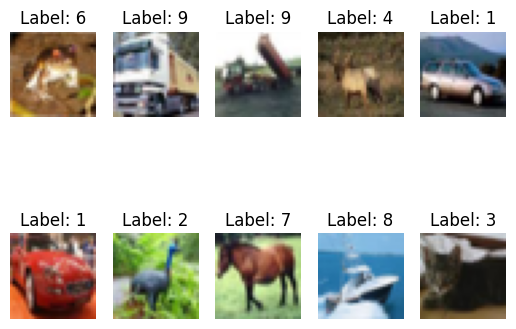

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')

plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Завантаження та підготовка даних CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Нормалізація піксельних значень до діапазону 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Перетворення міток на категоріальні значення
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Побудова згорткової нейронної мережі
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3503 - loss: 1.7480 - val_accuracy: 0.5430 - val_loss: 1.2644
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.5717 - loss: 1.2092 - val_accuracy: 0.6243 - val_loss: 1.0707
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.6392 - loss: 1.0260 - val_accuracy: 0.6367 - val_loss: 1.0250
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6807 - loss: 0.9172 - val_accuracy: 0.6781 - val_loss: 0.9284
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7043 - loss: 0.8412 - val_accuracy: 0.6929 - val_loss: 0.9017
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.7361 - loss: 0.7590 - val_accuracy: 0.7007 - val_loss: 0.8659
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7522 - loss: 0.7032 - val_accuracy: 0.7091 - val_loss: 0.8606
Epoch 8/10
1563/1563 ━━